In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
ecom_df = pd.read_csv('ecommerce_consumers.csv')

In [4]:
ecom_df.shape

(200, 3)

In [5]:
ecom_df.head()

,ratio,time,label
0,0.54,17.2,female
1,0.93,18.2,male
2,0.84,13.6,female
3,0.19,6.0,male
4,0.89,13.2,female


### Logistic Regression

In [6]:
X =  ecom_df.drop(['label'], axis=1)

In [7]:
Y = ecom_df['label']

In [8]:
X_train, X_test, y_train, y_split = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [9]:
logreg = LogisticRegression()

In [10]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
predictions = logreg.predict(X_test)

In [12]:
score = logreg.score(X_test, y_split)
print(score)

0.7


### SVM

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [14]:
n_folds = 5

In [26]:
# specify range of parameters (C) as a list
params = {"C": [1, 2, 5, 7, 10, 12]}

In [27]:
model = SVC(kernel='rbf')

In [28]:
# set up grid search scheme
model_cv = GridSearchCV(estimator = model, 
                         param_grid = params, 
                         scoring= 'accuracy', 
                         cv = n_folds, 
                         verbose = 1,
                        return_train_score=True)   

In [29]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 5, 7, 10, 12]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
# store CV results in cv_results
cv_results = model_cv.cv_results_
print(pd.DataFrame(model_cv.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.003516  4.783770e-04         0.000586    4.784160e-04       1   
1       0.002930  6.176324e-04         0.000977    9.536743e-08       2   
2       0.002734  3.907204e-04         0.000781    3.906489e-04       5   
3       0.002539  7.813692e-04         0.000586    4.784160e-04       7   
4       0.001953  1.784161e-07         0.000195    3.906250e-04      10   
5       0.002735  7.309709e-04         0.000781    3.906489e-04      12   

      params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 1}           0.931034           0.896552           0.821429   
1   {'C': 2}           0.931034           0.896552           0.857143   
2   {'C': 5}           0.931034           0.896552           0.892857   
3   {'C': 7}           0.931034           0.896552           0.857143   
4  {'C': 10}           0.931034           0.896552           0.892857   
5  {'C': 12}           0.931034     

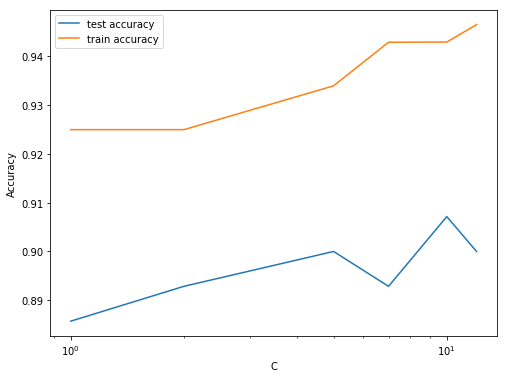

In [31]:
# plot C versus train and test scores (code already written)
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

### Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X_train, y_train)

In [30]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train.columns[0:])
features

ModuleNotFoundError: No module named 'pydotplus'